In [1]:
import impute as imp
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import calplot 
import datetime 
from pickle import dump,load
from tensorflow.keras.models import load_model

## Incomplete data with solar angles added imported without date index

In [2]:
path_archivo='../../01_weather_data/03_imputing_process/01_test_data/'
nombre_archivo='tmx_incomplete_solar_angles.csv'
tmx_inc=pd.read_csv(path_archivo+nombre_archivo,parse_dates=True)
tmx_inc

,time,Ib,Ig,to,RH,P,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,-75.506650,160.527038


# Identify the ubication of the datavoids (date, location and length)

In [3]:
isteps,datavoids=imp.void_identifier(tmx_inc,'Ig')

new_void_at: 2018-01-30 07:20:00
at index 4220
67
new_void_at: 2018-03-29 06:40:00
at index 12568
73
new_void_at: 2018-06-15 06:10:00
at index 23797
79
new_void_at: 2018-06-27 06:10:00
at index 25525
79
new_void_at: 2018-07-28 06:20:00
at index 29990
78
new_void_at: 2018-08-12 06:30:00
at index 32151
76
new_void_at: 2018-10-05 06:40:00
at index 39928
70
new_void_at: 2018-11-14 06:50:00
at index 45689


#### Data voids location

In [4]:
isteps

[4220, 12568, 23797, 25525, 29990, 32151, 39928, 45689]

#### Data voids length

In [5]:
datavoids

[67, 73, 79, 79, 78, 76, 70, 67]

In [6]:
tmx_inc

,time,Ib,Ig,to,RH,P,alturasolar,azimuth
0,2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11,-79.806160,166.773196
1,2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37,-81.878940,170.053742
2,2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64,-83.764991,173.367191
3,2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21,-85.236372,176.703016
4,2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91,-85.827949,-179.949903
...,...,...,...,...,...,...,...,...
52555,2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32,-68.725457,151.345160
52556,2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70,-71.001501,154.338568
52557,2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03,-73.264218,157.400817
52558,2018-12-31 23:40:00,0.0,0.0,17.99,47.85,87470.02,-75.506650,160.527038


### Verifico que s'i hay un vac'io de datos

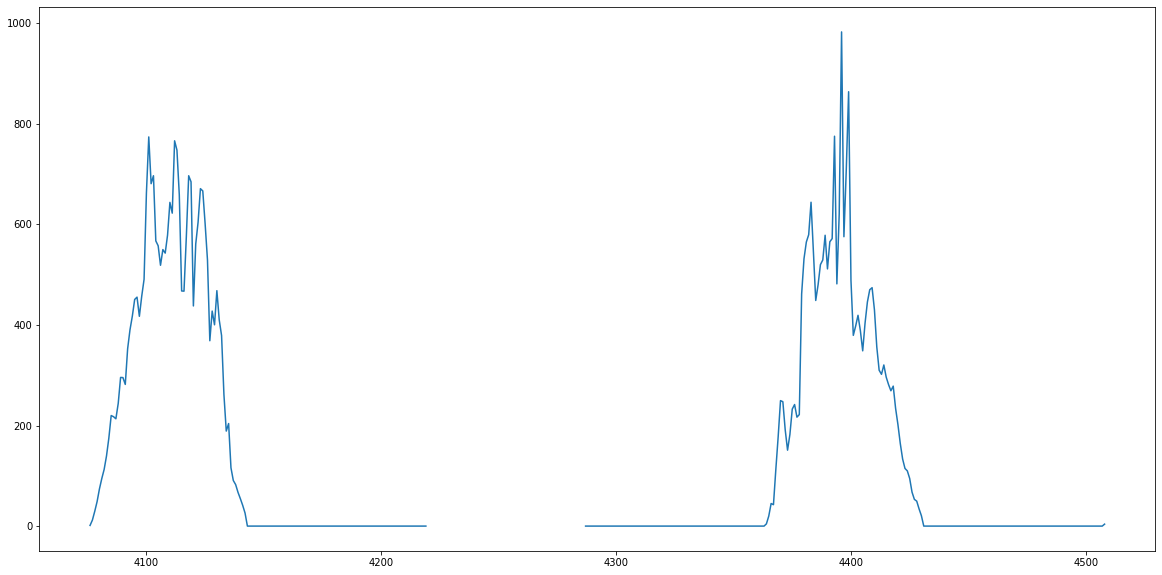

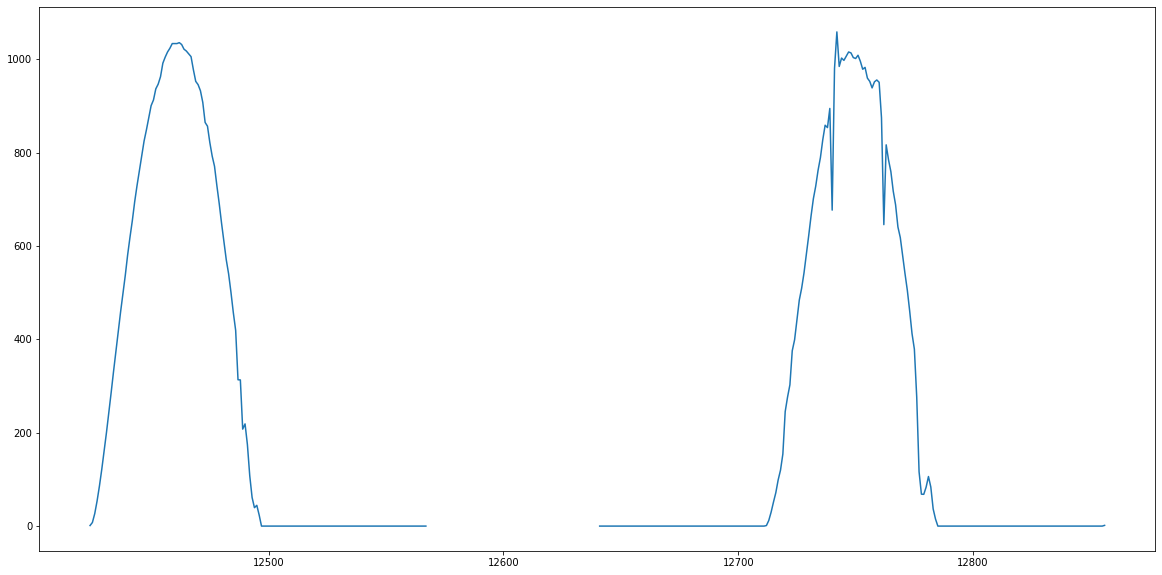

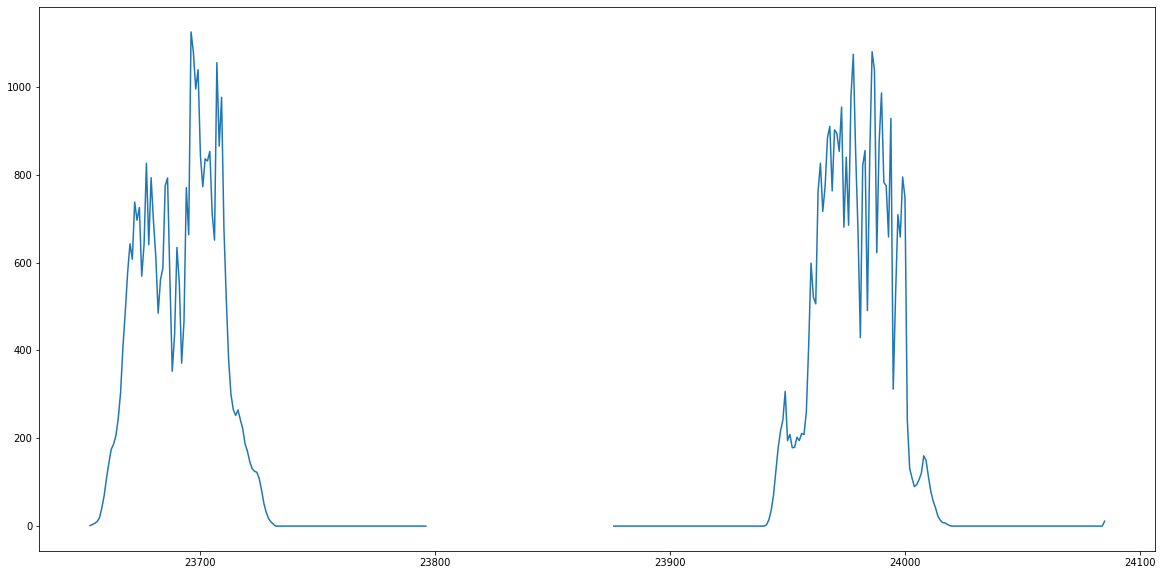

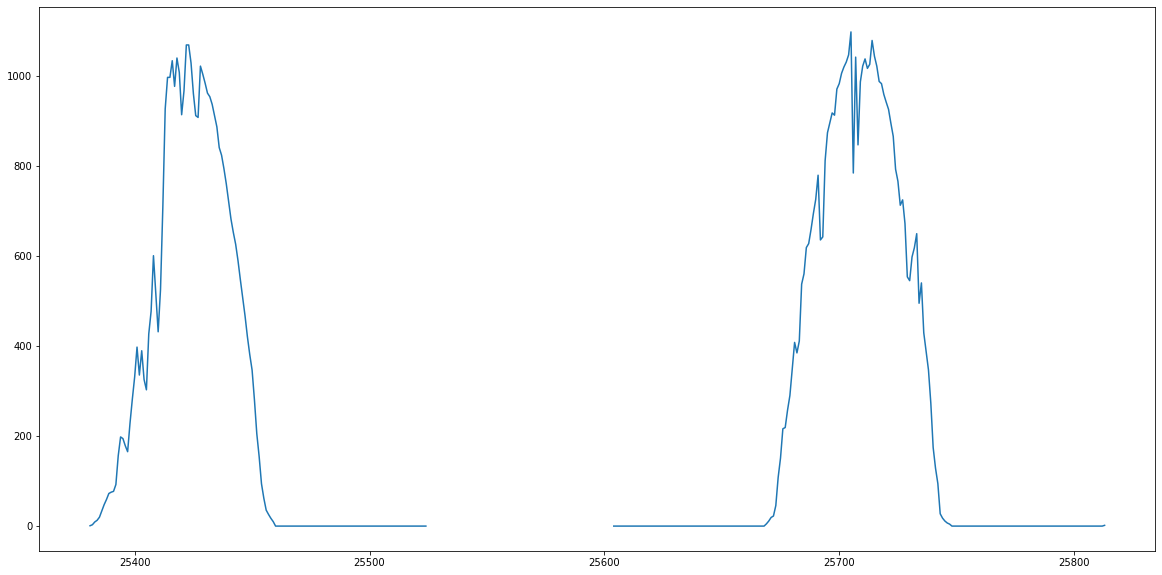

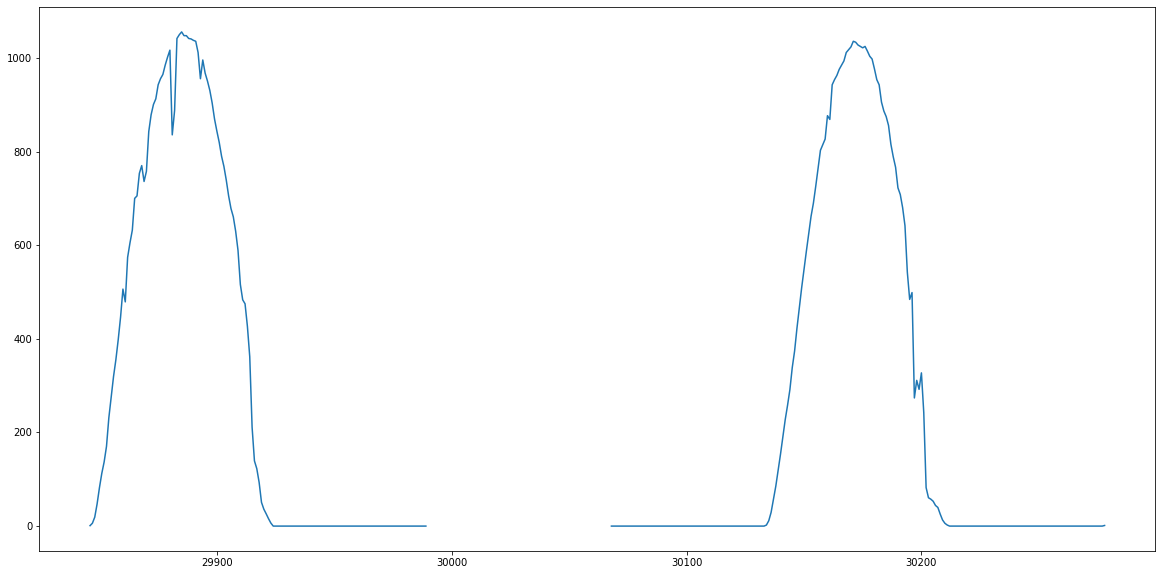

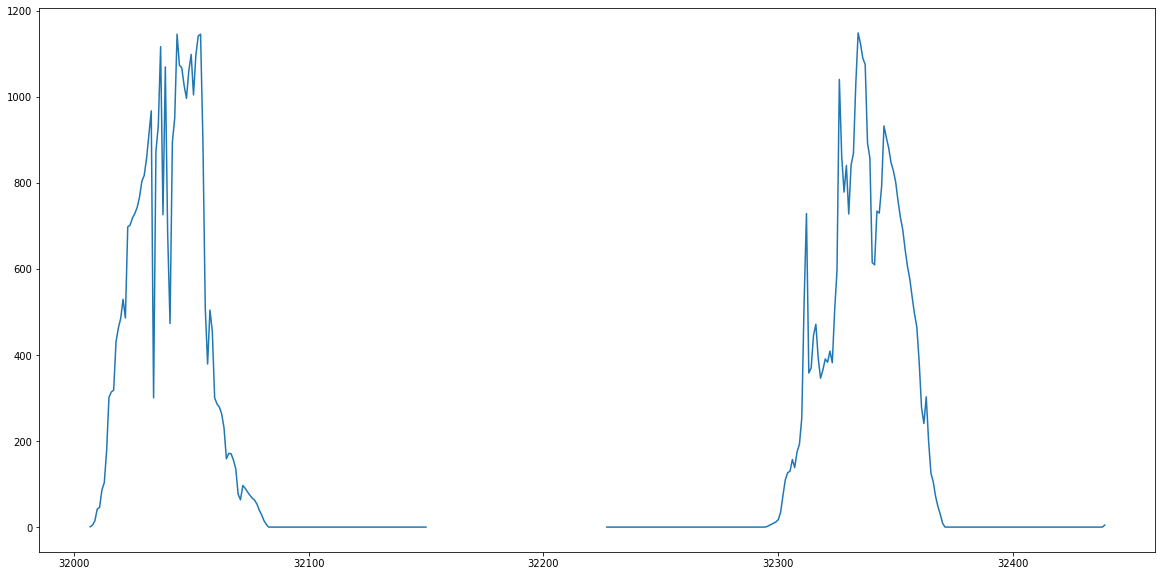

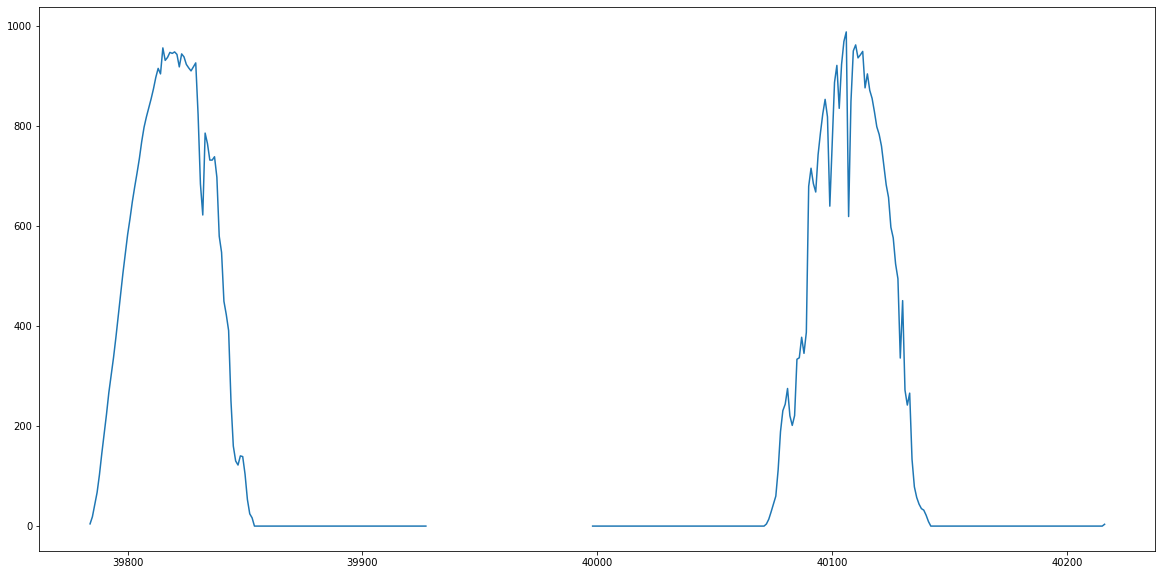

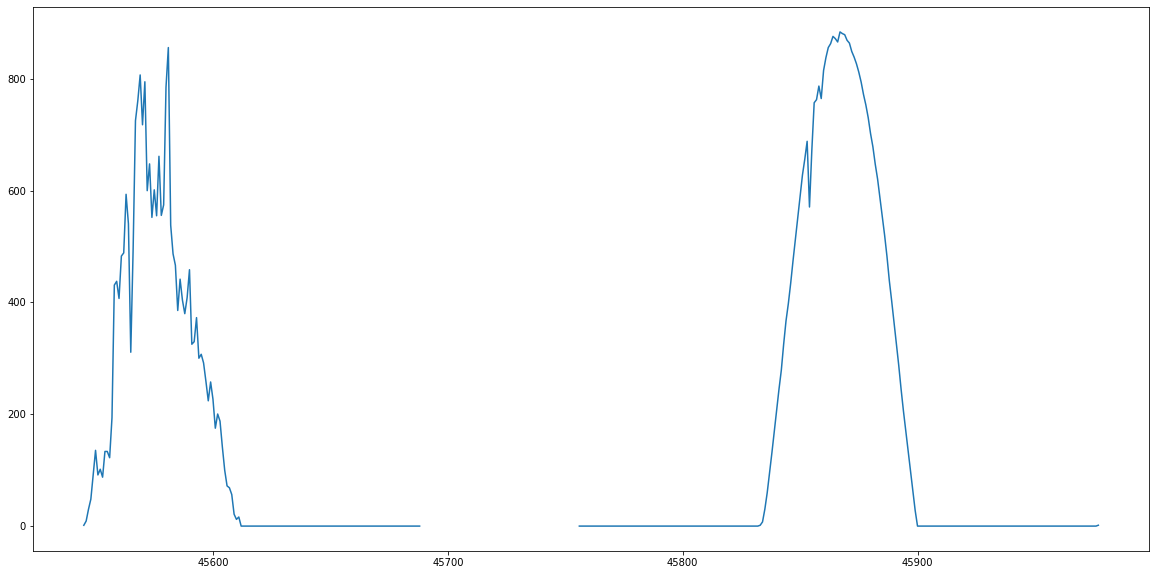

In [7]:
for istep in range(len(isteps)):
    fig, ax=plt.subplots(figsize=(20,10))
    ax.plot(tmx_inc['Ig'].loc[isteps[istep]-144:isteps[istep]+288])

# Imputo datos, con la lista de la ubicaci'on  de los vac'ios de datos

In [8]:
nombres1=['time','Ib','Ig','to','RH','P','alturasolar','azimuth']
esoru=imp.importa('../../01_weather_data/03_imputing_process/01_test_data/tmx_incomplete_solar_angles.csv',nombres1)
dias_rango=1
forward_steps=dias_rango*144
in_size,out_size= 6,6 
model_name='../../03_CNN-LSTM_training/02_grid_training/01_models/train_seasonal_layers_2_2_1_out_s_6in_s_6_lr_0.0001_Global_BS12.h5'
model=load_model(model_name)
inputs=['Ig','Ib','to','RH','azimuth','alturasolar']
outputs=['Ig']
training_step=1
season_size=144
path_archivo1='../../01_weather_data/03_imputing_process/01_test_data/'
nombre_archivo1='tmx_incomplete_solar_angles.csv'
path_archivo2='../../01_weather_data/03_imputing_process/02_imputed_data/'
nombre_archivo2='Tmx_CNN-LSTM_imputed.csv'
scalery=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/y_scalerv06.pkl','rb'))
scalerx=load(open('../../03_CNN-LSTM_training/02_grid_training/03_scalers/x_scalerv06.pkl','rb'))
# for void in range(len(datavoids)): #xxx revisar el isteps -144 por qu'e lo hice?
for void in range(len(datavoids)):
    predi,targ=imp.Multioneshot(esoru,datavoids[void],out_size,in_size,isteps[void]-144,model,inputs,outputs,training_step,season_size,scalerx,scalery)
    if void==0:
         imputed=imp.seasonal_exporta(path_archivo1+nombre_archivo1,'Ig',predi,isteps[void],in_size,
                                          datavoids[void],season_size,nombres1,sol_data_correction=True, archivo_nombre=path_archivo2+nombre_archivo2,save=True)
    imputed=imp.seasonal_exporta(path_archivo2+nombre_archivo2,'Ig',predi,isteps[void],in_size,
                                 datavoids[void],season_size,nombres1,sol_data_correction=True, archivo_nombre=path_archivo2+nombre_archivo2,save=True)
    
    
    
    
    

2021-10-18 21:29:33.739174: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2021-10-18 21:29:34.448854: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/Users/aigz/.pyenv/versions/3.9.5/lib/python3.9/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is 

In [17]:
imputed_csv=pd.read_csv('../../01_weather_data/03_imputing_process/02_imputed_data/Tmx_CNN-LSTM_imputed.csv',index_col=0,parse_dates=True)
imputed_csv


,Ib,Ig,to,RH,P
time,,,,,
2018-01-01 00:00:00,0.0,0.0,18.70,36.34,87864.11
2018-01-01 00:10:00,0.0,0.0,18.95,35.29,87876.37
2018-01-01 00:20:00,0.0,0.0,18.94,35.43,87888.64
2018-01-01 00:30:00,0.0,0.0,18.77,35.89,87887.21
2018-01-01 00:40:00,0.0,0.0,18.81,36.34,87886.91
...,...,...,...,...,...
2018-12-31 23:10:00,0.0,0.0,18.51,47.29,87484.32
2018-12-31 23:20:00,0.0,0.0,18.26,48.02,87470.70
2018-12-31 23:30:00,0.0,0.0,18.39,46.84,87455.03


### Importo tambien csv con datos completos 

In [34]:
comp=pd.read_csv('../../01_weather_data/03_imputing_process/01_test_data/base_temixco.csv',index_col=0,parse_dates=True)

In [12]:
dias=['2018-03-29',
'2018-01-30',
'2018-06-27',
'2018-06-15',
'2018-07-28',
'2018-08-12',
'2018-10-05',
'2018-11-14']

(<Figure size 900x122.4 with 2 Axes>,
 array([<AxesSubplot:ylabel='2018'>], dtype=object))

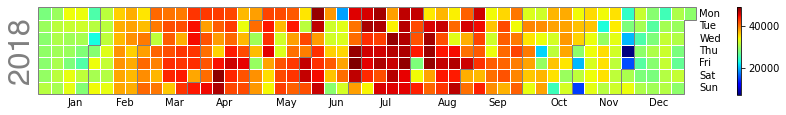

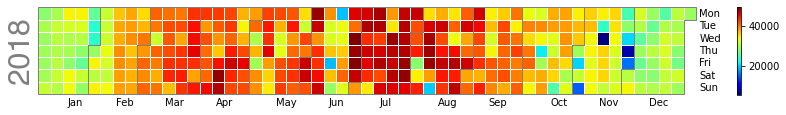

In [23]:
calplot.calplot(imputed_csv.Ig,cmap='jet')
calplot.calplot(comp.Ig,cmap='jet')

## Grafico los datos imputados contra los reales, de los dias que hac'ian falta

day_mae: 16.349050232304467


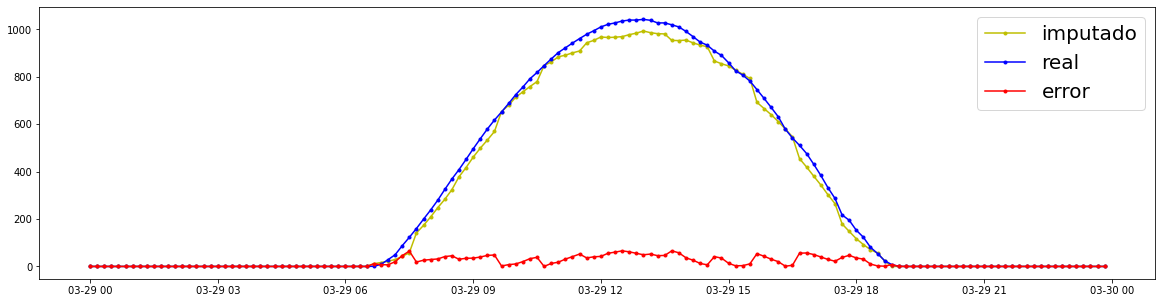

day_mae: 70.66917798535029


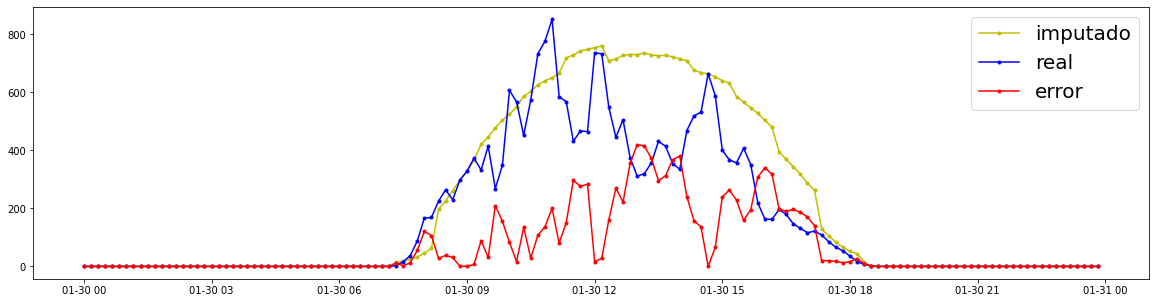

day_mae: 65.06391562891007


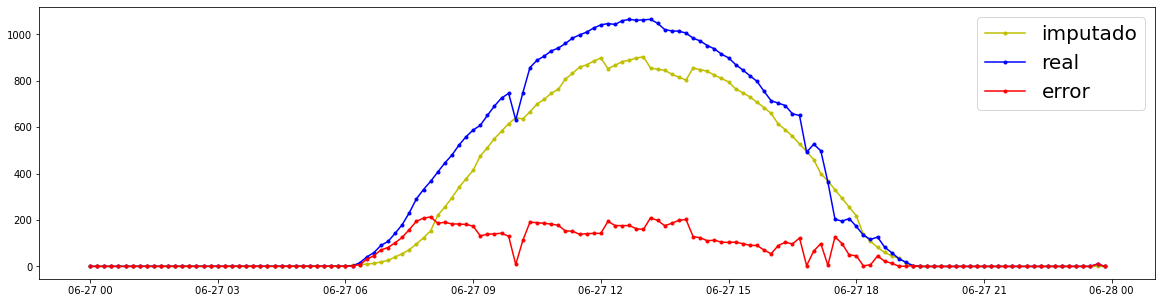

day_mae: 152.8260415445434


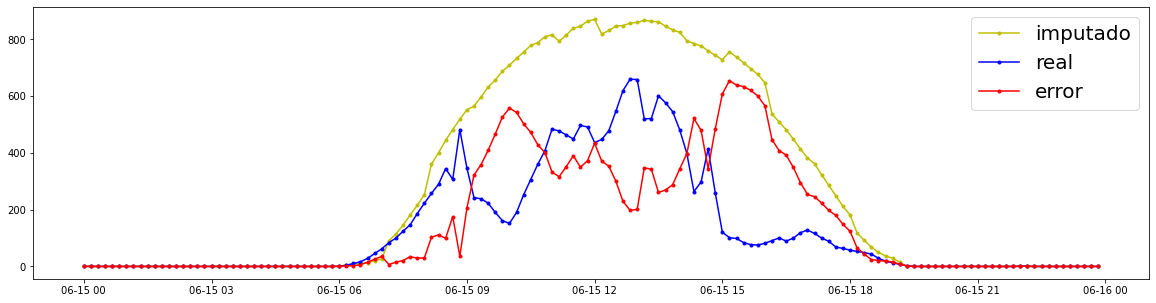

day_mae: 30.575609461837345


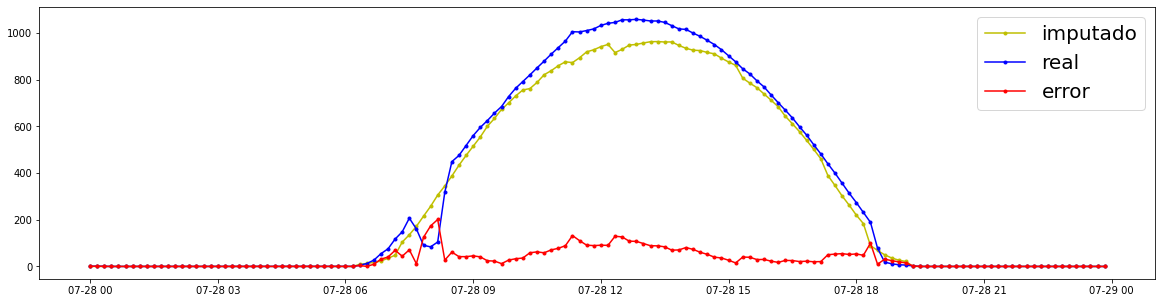

day_mae: 144.8527112305959


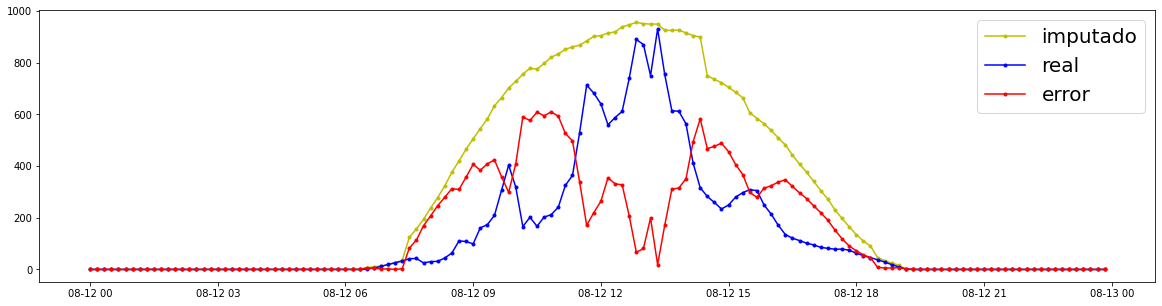

day_mae: 20.68598877223333


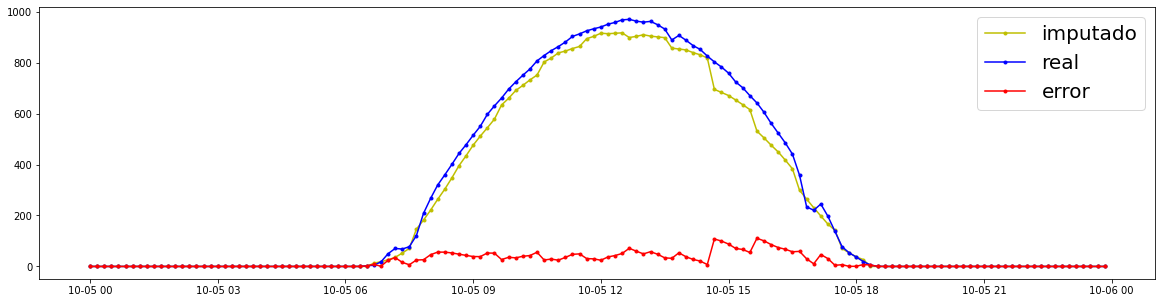

day_mae: 167.03413568014568


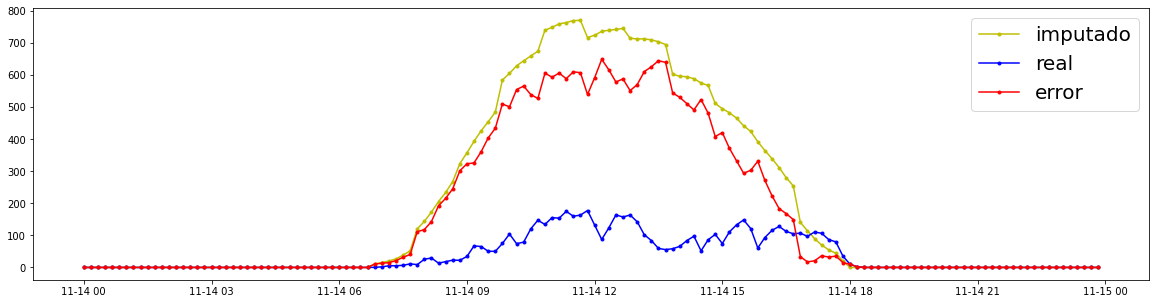

In [33]:
comp['me']=np.abs(comp.Ig-imputed_csv.Ig)
meyear=comp.me.resample('D').mean()
for dia in dias:
    fig, ax=plt.subplots(figsize=(20,5))
    print('day_mae:',meyear[dia])
    plt.plot(imputed_csv.Ig[dia],'y.-',label='imputado')
    plt.plot(comp.Ig[dia],'b.-',label='real')
    plt.plot(comp.me[dia],'r.-',label='error')
    plt.legend(fontsize=20)
    plt.show()